#Cleaning, EDA on cryptocurrency data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
import os
directory_in_str = '/content/drive/MyDrive/home_repo_big_data/data/market/Cryptocurrencies'
directory = os.fsencode(directory_in_str)
ds = '/content/drive/MyDrive/home_repo_big_data/clean_data/market/Cryptocurrencies/'
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    df = pd.read_csv(directory_in_str + '/' + filename)
    if filename.endswith(".csv"):
        # print(ds + filename)
        if 'DATE' in df.columns:
            df.rename(columns={'DATE': 'Date'}, inplace=True)
        if 'date' in df.columns:
            df.rename(columns={'date': 'Date'}, inplace=True)
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])

        df.to_csv(ds + 'Cleaned_' + filename.split('.')[0] + '.csv', index=False, header=True)
        print('Cleaned' + filename.split('.')[0])
        continue
    else:
        continue

CleanedHistoricalQuotes_BTC
CleanedHistoricalQuotes_ETH
CleanedHistoricalQuotes_XRP
CleanedHistoricalQuotes_BHC
CleanedHistoricalQuotes_ADA
CleanedHistoricalQuotes_LTC
CleanedHistoricalQuotes_XEM
CleanedHistoricalQuotes_XLM
CleanedHistoricalQuotes_EOS
CleanedHistoricalQuotes_NEO
CleanedHistoricalQuotes_MIOTA
CleanedHistoricalQuotes_DASH
CleanedHistoricalQuotes_XMR
CleanedHistoricalQuotes_TRX
CleanedHistoricalQuotes_XTZ
CleanedHistoricalQuotes_DOGE
CleanedHistoricalQuotes_ETC
CleanedHistoricalQuotes_VEN
CleanedHistoricalQuotes_USDT
CleanedHistoricalQuotes_BNB


In [17]:
df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/clean_data/market/Cryptocurrencies/Cleaned_HistoricalQuotes_ADA.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-11-23,0.178282,N/A,0.148736,0.178562,0.154096
1,2020-11-22,0.148191,N/A,0.127666,0.152024,0.141364
2,2020-11-21,0.128374,N/A,0.117527,0.139531,0.124261
3,2020-11-20,0.117656,N/A,0.107744,0.121790,0.116413
4,2020-11-19,0.107377,N/A,0.106585,0.107743,0.105561


In [10]:
def each_cur(df):
    close_vals = []
    for i in range(len(df[' Close/Last'])-1, -1, -1):
        close_vals.append(df[' Close/Last'][::-1][i])
    return close_vals    

In [11]:
directory_in_str = '/content/drive/MyDrive/home_repo_big_data/clean_data/market/Cryptocurrencies'
directory = os.fsencode(directory_in_str)
ds = '/content/drive/MyDrive/home_repo_big_data/clean_data/market/Cryptocurrencies/'

file_order = []
all_close_vals = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        
        file_order.append(filename[25:28])
        df = pd.read_csv(ds + filename)
        close_vals = each_cur(df)
        all_close_vals.append(close_vals)

        continue
    else:
        continue

In [49]:
cur_dict = {'BTC' : 'Bitcoin',
            'ETH' : 'Ethereum',
            'XRP' : 'Ripple',
            'BHC' : 'Bitcoin Cash',
            'ADA' : 'Cardano',
            'LTC' : 'Litecoin',
            'XEM' : 'NEM',
            'XLM' : 'Stellar',
            'EOS' : 'EOS',
            'NEO' : 'NEO',
            'MIO' : 'IOTA',
            'DAS' : 'Dash',
            'XMR' : 'Monero',
            'TRX' : 'TRON',
            'XTZ' : 'Tezos',
            'DOG' : 'Dogecoin',
            'ETC' : 'Ethereum Classic',
            'VEN' : 'VeChain',
            'USD' : 'Tether',
            'BNB' : 'Binance Coin'
            }

In [52]:
def plot_line(close_vals, cur):
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(close_vals)
    ax.set_xlabel('Days(last Nov 23rd)')
    ax.set_ylabel('Value in USD')
    ax.set_title(f'{cur} closing values')
    ax.grid()
    plt.show()
    return

In [ ]:
def perc_change(r,s):
    changes = []
    for x1, x2 in zip(r, s):
        try:
            pct = (x2 - x1) * 100 / x1
        except ZeroDivisionError:
            pct = None
        changes.append(pct)
    return changes    

In [128]:
def plot_line_perc(close_vals, cur):
    fig = plt.figure(figsize = (12,4))
    ax1 = fig.add_subplot(1,2,1)

    plt.rcdefaults()
    ax1.plot(close_vals)
    ax1.set_xlabel('Days(0-328),(last Nov 23rd)')
    ax1.set_ylabel('Value in USD')
    ax1.set_title(f'{cur} closing values')
    ax1.grid()

    ax2 = fig.add_subplot(1,2,2)
    plt.rcdefaults()
    ax2.plot(perc_change(close_vals[:-1], close_vals[1:]), color = 'orange')
    ax2.set_xlabel('Days(0-328),(last Nov 23rd)')
    ax2.set_ylabel('Percentage change')
    ax2.set_title(f'Percentage change on {cur} closing values')
    ax2.grid()

    return

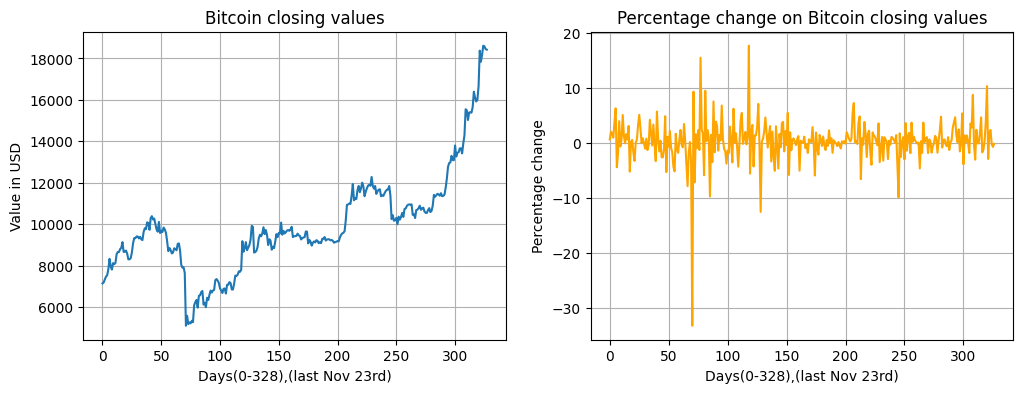

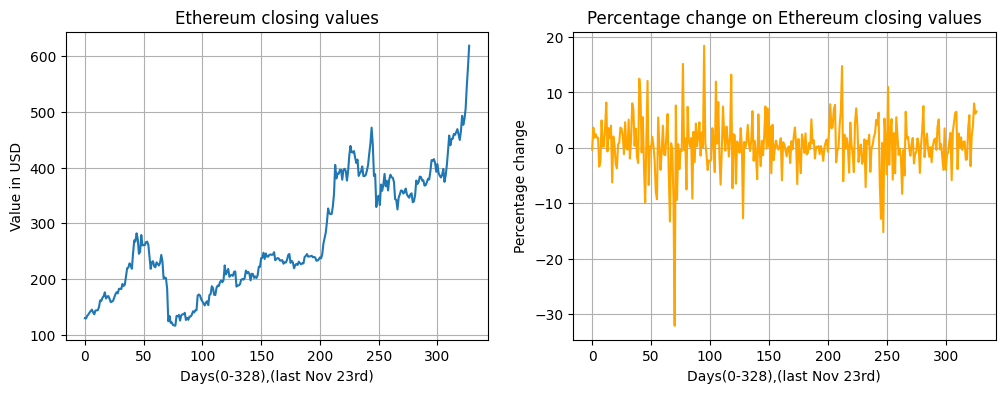

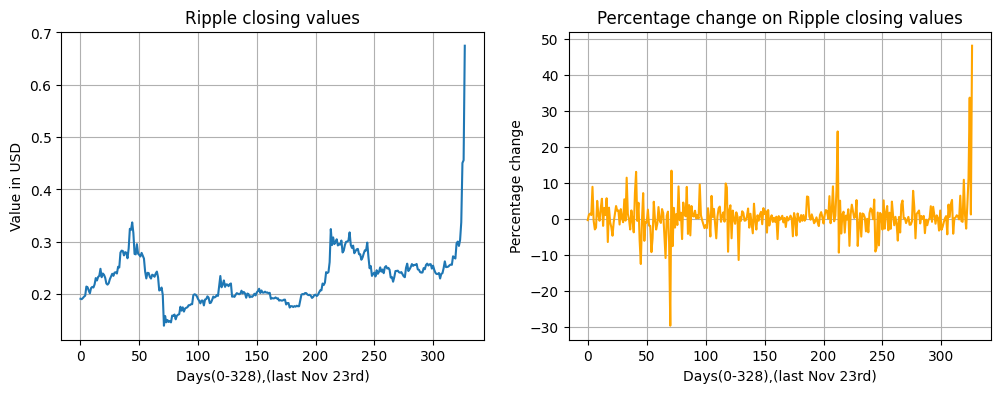

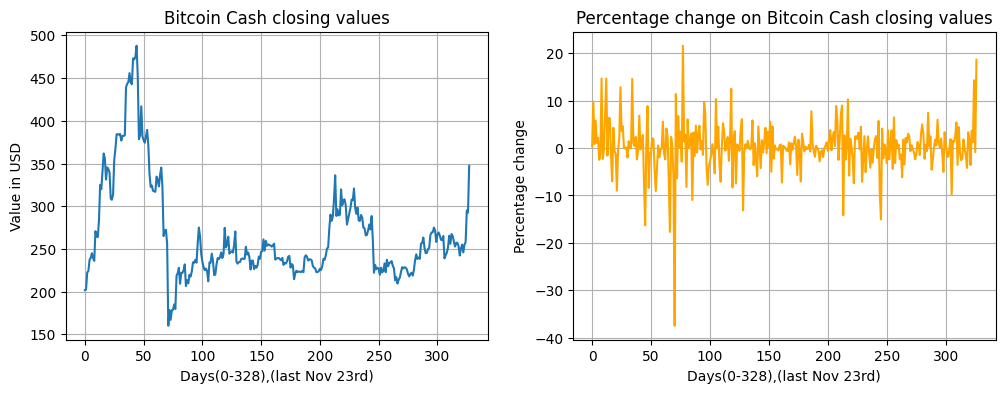

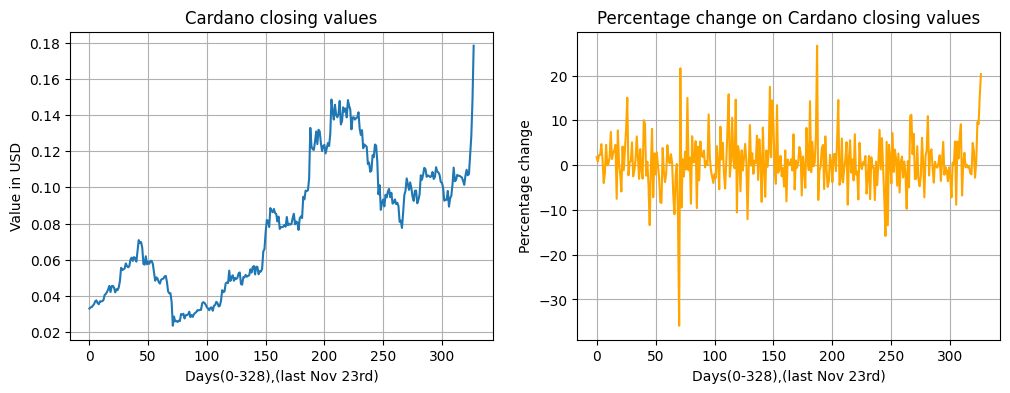

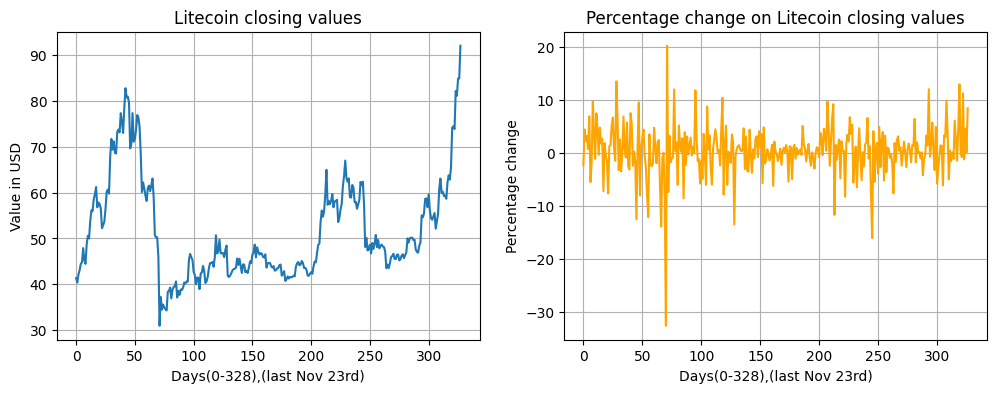

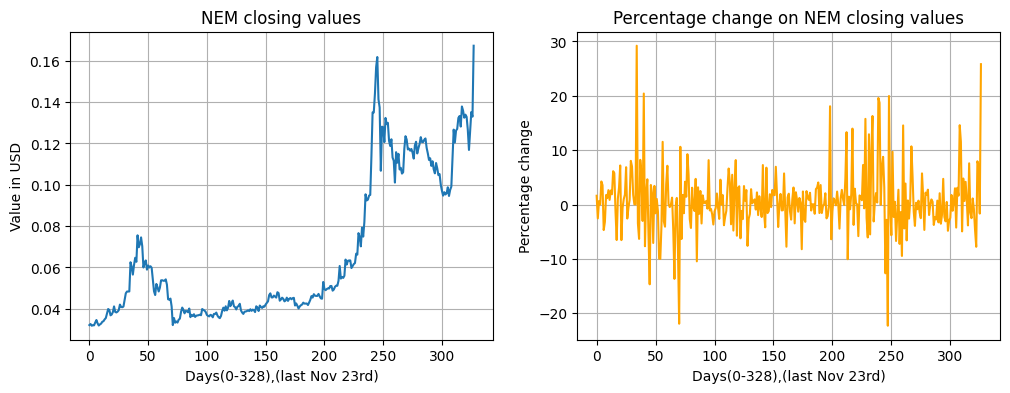

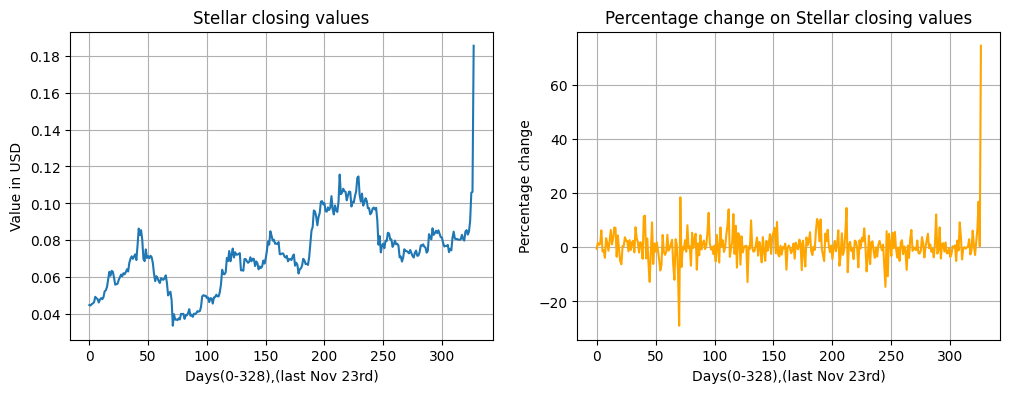

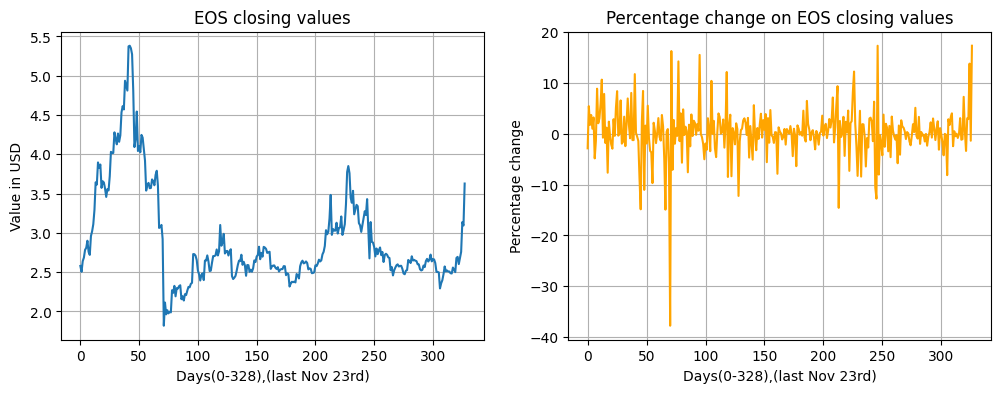

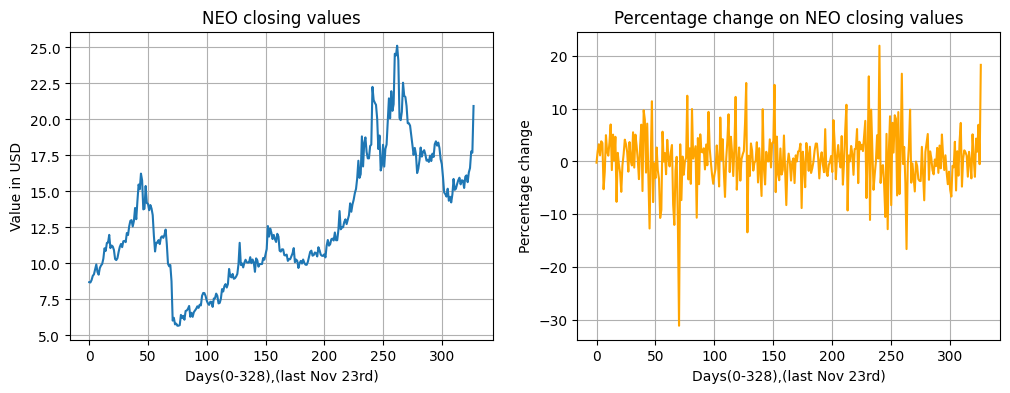

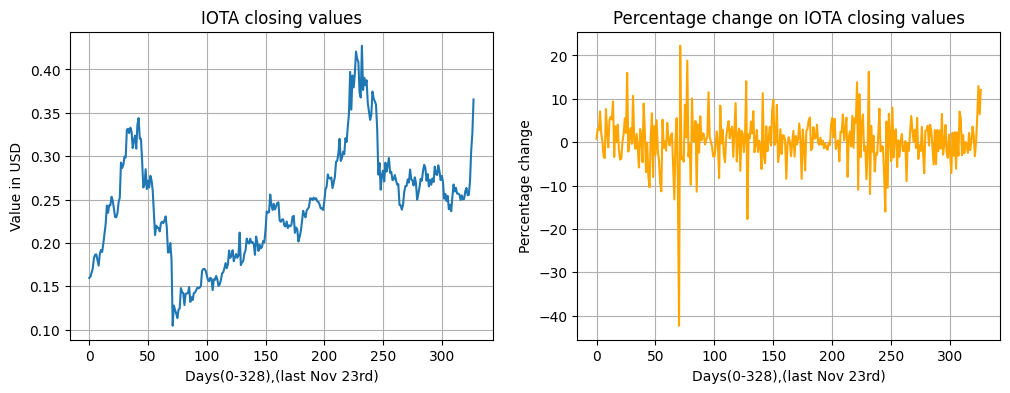

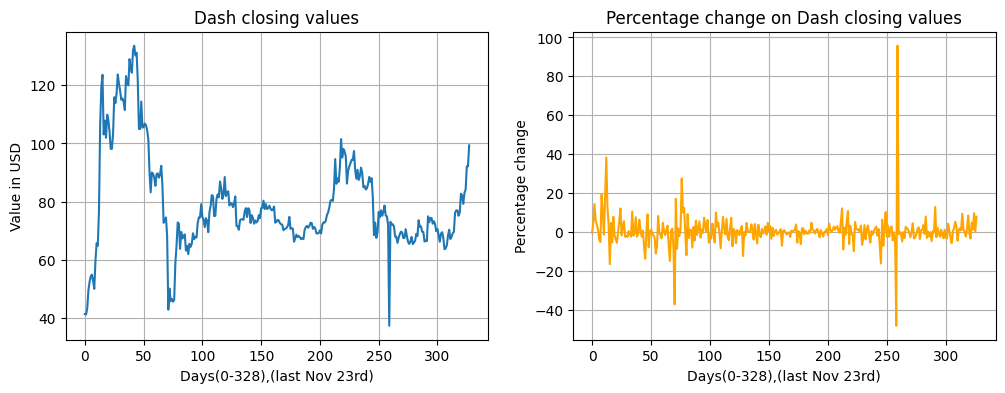

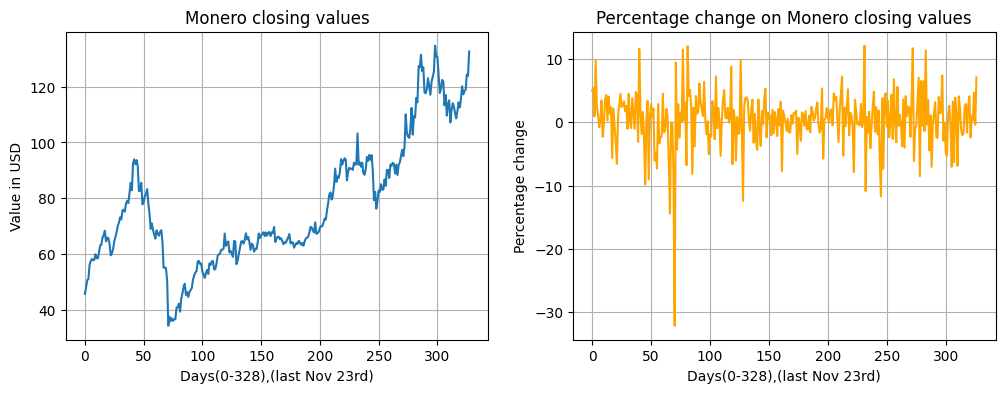

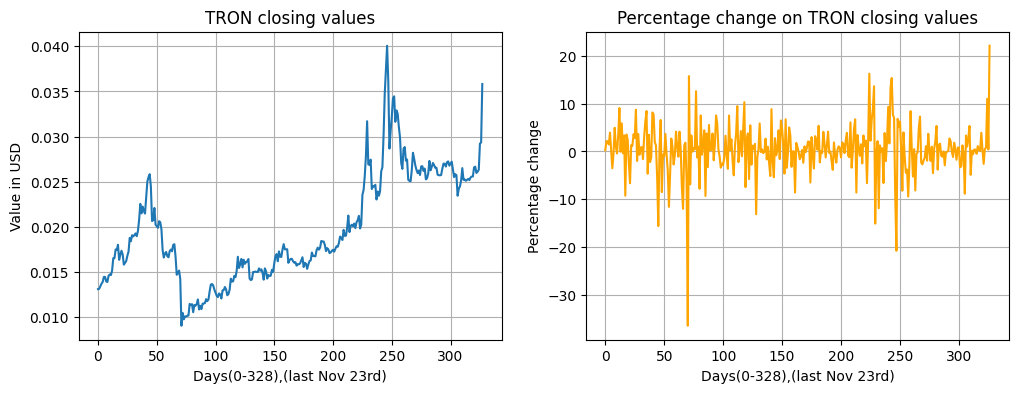

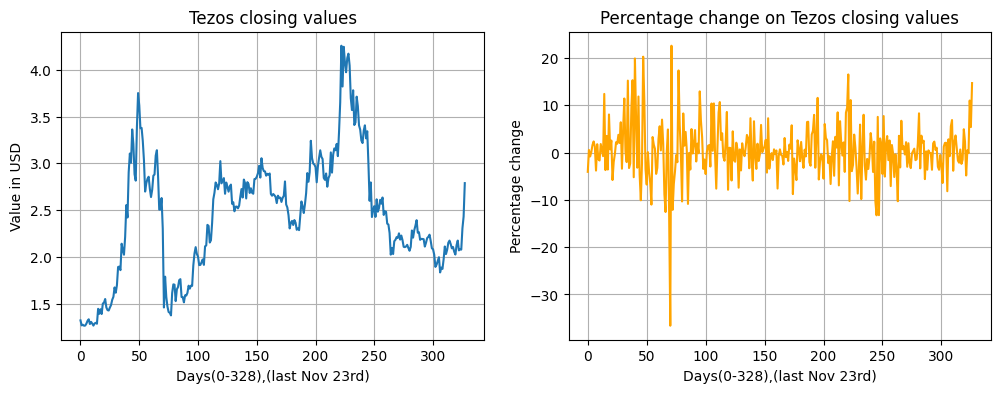

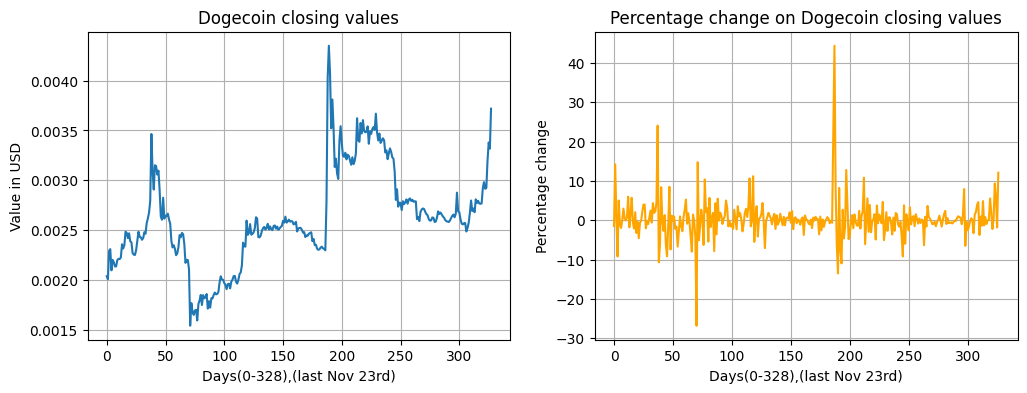

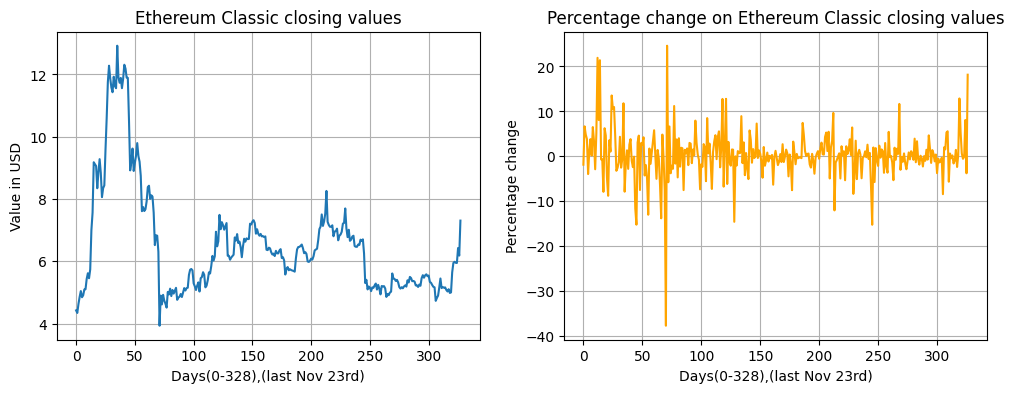

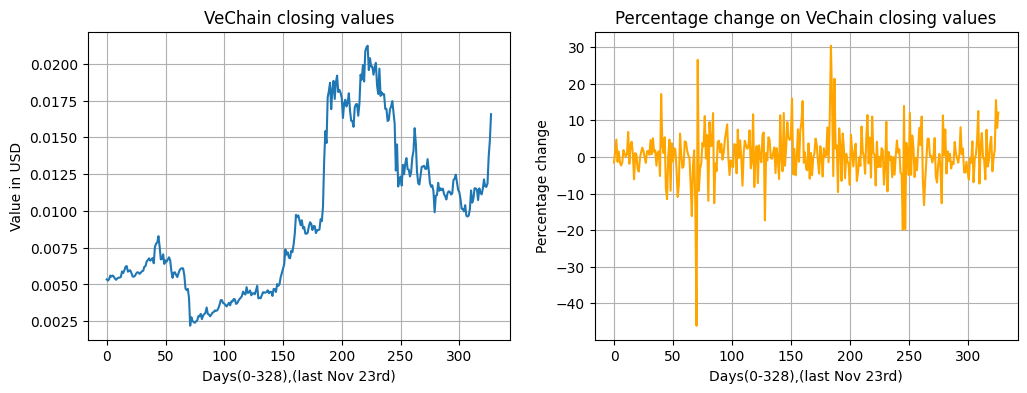

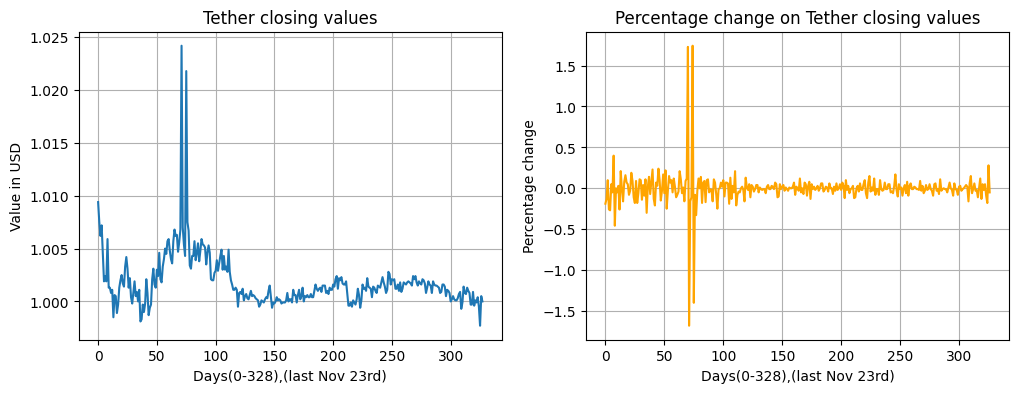

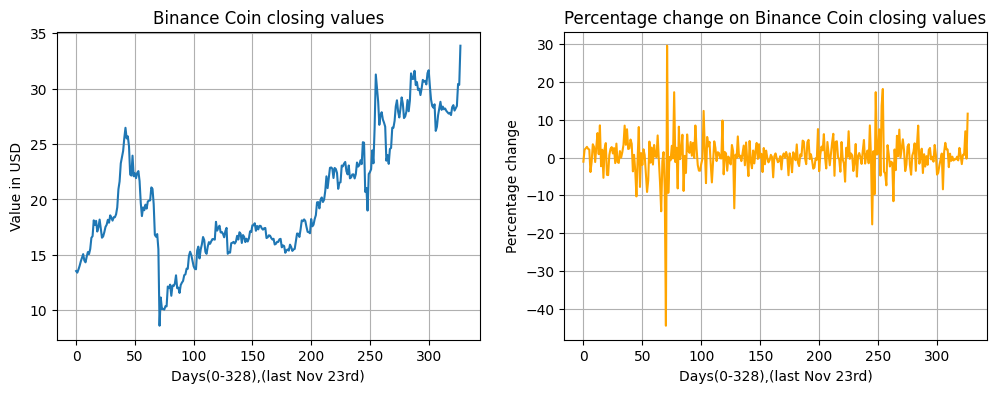

In [129]:
for f, clv in zip(file_order, all_close_vals):
    plot_line_perc(clv, cur_dict[f])